<a href="https://colab.research.google.com/github/jaeyoonjeong9024/4weeks/blob/main/wine_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 셀 1: 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 셀 2: 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep=';')
print("데이터 shape:", df.shape)
print("\n데이터 기본 정보:")
print(df.info())

데이터 shape: (4898, 12)

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [4]:
# 셀 3: 데이터 확인 및 시각화
print("데이터 샘플:")
print(df.head(10))
print("\n기술 통계:")
print(df.describe())

데이터 샘플:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00

원본 품질 분포:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


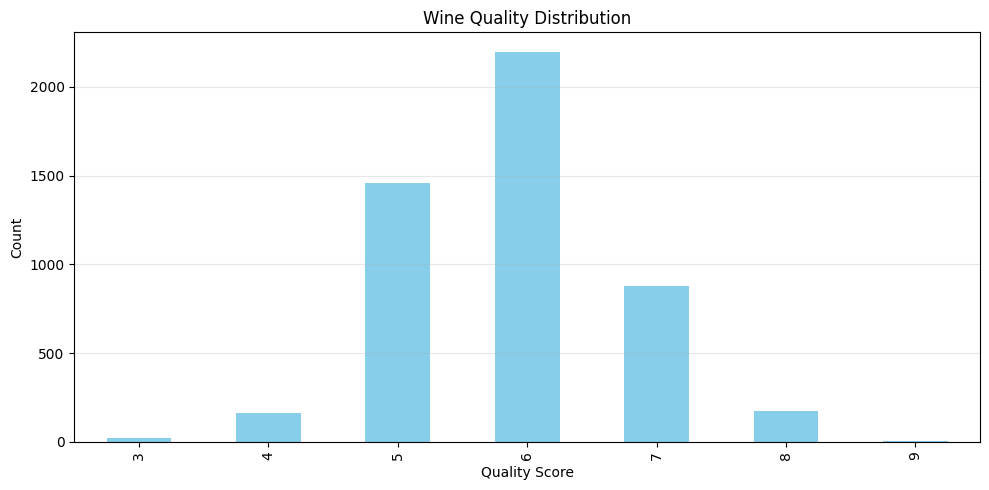

In [5]:
# 셀 4: 품질 분포 시각화
print("원본 품질 분포:")
print(df['quality'].value_counts().sort_index())

plt.figure(figsize=(10, 5))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# 셀 5: 3등급으로 재라벨링
df['quality_label'] = df['quality'].apply(lambda x: 0 if x <= 4 else (1 if x <= 6 else 2))

print("재라벨링 분포:")
print(df['quality_label'].value_counts().sort_index())
print("\n라벨 의미: 0=낮음(3-4), 1=중간(5-6), 2=높음(7-9)")

print("\n라벨링 예시:")
print(df[['quality', 'quality_label']].drop_duplicates().sort_values('quality'))

재라벨링 분포:
quality_label
0     183
1    3655
2    1060
Name: count, dtype: int64

라벨 의미: 0=낮음(3-4), 1=중간(5-6), 2=높음(7-9)

라벨링 예시:
     quality  quality_label
251        3              0
46         4              0
10         5              1
0          6              1
13         7              2
17         8              2
774        9              2


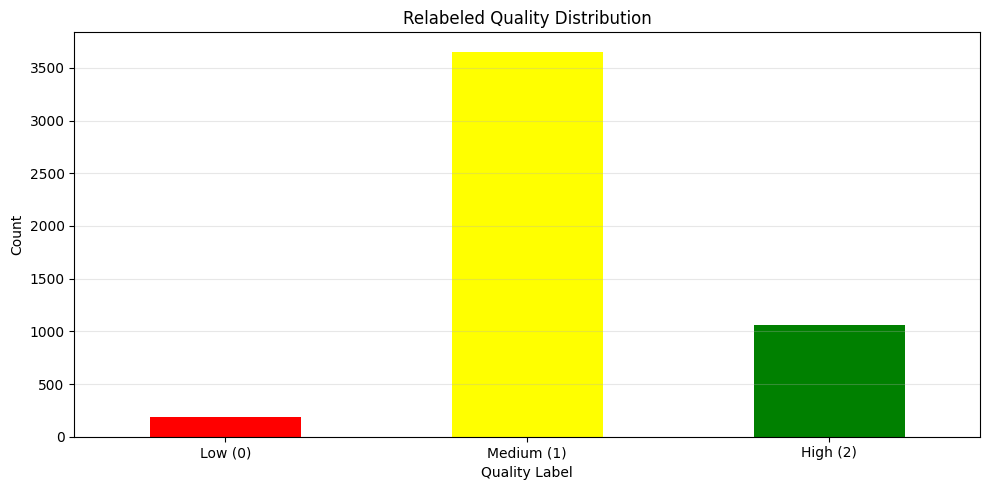

In [7]:
# 셀 6: 라벨링 결과 시각화
plt.figure(figsize=(10, 5))
df['quality_label'].value_counts().sort_index().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Relabeled Quality Distribution')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Low (0)', 'Medium (1)', 'High (2)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# 셀 7: 데이터 전처리
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = pd.get_dummies(y).values
X = X

In [9]:
# 셀 8: 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("훈련 데이터:", X_train.shape, "| 테스트 데이터:", X_test.shape)

훈련 데이터: (3918, 11) | 테스트 데이터: (980, 11)


In [10]:
# 셀 9: 딥러닝 모델 구축
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,947 (11.51 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 셀 10: 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7318 - loss: 0.7583 - val_accuracy: 0.7870 - val_loss: 0.5613
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7689 - loss: 0.5852 - val_accuracy: 0.7857 - val_loss: 0.5297
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7683 - loss: 0.5631 - val_accuracy: 0.7895 - val_loss: 0.5060
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7826 - loss: 0.5333 - val_accuracy: 0.7895 - val_loss: 0.4948
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7776 - loss: 0.5228 - val_accuracy: 0.8010 - val_loss: 0.4896
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.5176 - val_accuracy: 0.8023 - val_loss: 0.4780
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.5142 - val_accuracy: 0.7934 - val_loss: 0.4786
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4987 - val_accuracy: 0.

In [12]:
# 셀 11: 예측 및 클래스 변환
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


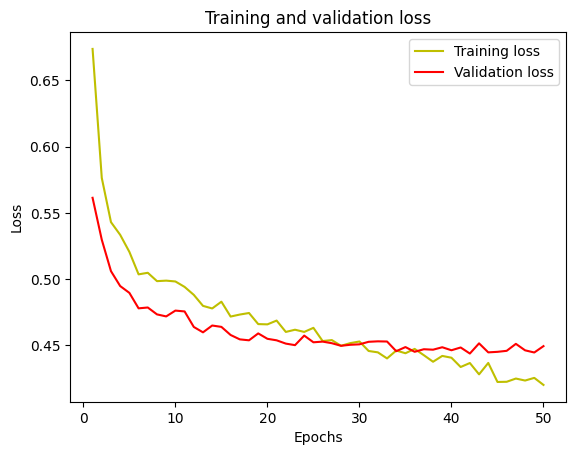

In [13]:
# 셀 12: 학습 곡선 - Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

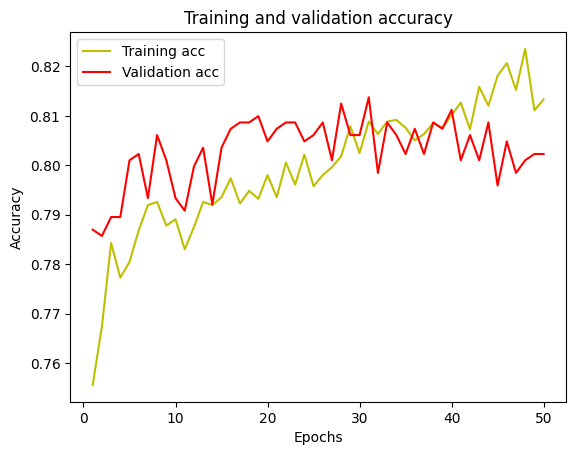

In [14]:
# 셀 13: 학습 곡선 - Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# 셀 14: 성능 평가
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.15      0.25        60
           1       0.80      0.88      0.84       704
           2       0.57      0.52      0.55       216

    accuracy                           0.76       980
   macro avg       0.73      0.52      0.55       980
weighted avg       0.75      0.76      0.74       980

[[  9  49   2]
 [  2 619  83]
 [  0 103 113]]


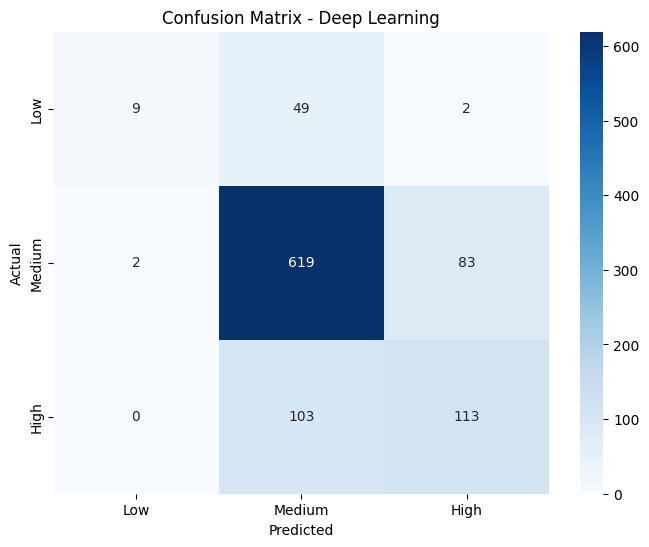

In [17]:
# 셀 15: 혼동 행렬 시각화
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()